<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)

## Load and Prepare Data

In [2]:
df = pd.read_csv('country_vaccinations.csv')
cdf = df 
df.head(20)

country iso_code        date  total_vaccinations  people_vaccinated  \
0   Afghanistan      AFG  2021-02-22                 0.0                0.0   
1   Afghanistan      AFG  2021-02-23                 NaN                NaN   
2   Afghanistan      AFG  2021-02-24                 NaN                NaN   
3   Afghanistan      AFG  2021-02-25                 NaN                NaN   
4   Afghanistan      AFG  2021-02-26                 NaN                NaN   
5   Afghanistan      AFG  2021-02-27                 NaN                NaN   
6   Afghanistan      AFG  2021-02-28              8200.0             8200.0   
7   Afghanistan      AFG  2021-03-01                 NaN                NaN   
8   Afghanistan      AFG  2021-03-02                 NaN                NaN   
9   Afghanistan      AFG  2021-03-03                 NaN                NaN   
10  Afghanistan      AFG  2021-03-04                 NaN                NaN   
11  Afghanistan      AFG  2021-03-05                 NaN                NaN   
12  Afghanistan      AFG  2021-03-06                 NaN                NaN   
13  Afghanistan      AFG  2021-03-07                 NaN                NaN   
14  Afghanistan      AFG  2021-03-08                 NaN                NaN   
15  Afghanistan      AFG  2021-03-09                 NaN                NaN   
16  Afghanistan      AFG  2021-03-10                 NaN                NaN   
17  Afghanistan      AFG  2021-03-11                 NaN                NaN   
18  Afghanistan      AFG  2021-03-12                 NaN                NaN   
19  Afghanistan      AFG  2021-03-13                 NaN                NaN   

    people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                       NaN                     NaN                 NaN   
1                       NaN                     NaN              1367.0   
2                       NaN                     NaN              1367.0   
3                       NaN                     NaN              1367.0   
4                       NaN                     NaN              1367.0   
5                       NaN                     NaN              1367.0   
6                       NaN                     NaN              1367.0   
7                       NaN                     NaN              1580.0   
8                       NaN                     NaN              1794.0   
9                       NaN                     NaN              2008.0   
10                      NaN                     NaN              2221.0   
11                      NaN                     NaN              2435.0   
12                      NaN                     NaN              2649.0   
13                      NaN                     NaN              2862.0   
14                      NaN                     NaN              2862.0   
15                      NaN                     NaN              2862.0   
16                      NaN                     NaN              2862.0   
17                      NaN                     NaN              2862.0   
18                      NaN                     NaN              2862.0   
19                      NaN                     NaN              2862.0   

    total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.00                           0.00   
1                              NaN                            NaN   
2                              NaN                            NaN   
3                              NaN                            NaN   
4                              NaN                            NaN   
5                              NaN                            NaN   
6                             0.02                           0.02   
7                              NaN                            NaN   
8                              NaN                            NaN   
9                              NaN                            NaN   
10           

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [4]:
data_df = pd.read_csv("country_vaccinations.csv")

country_vaccine = data_df.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()
country_vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']



In [5]:
vaccines = country_vaccine.Vaccines.unique()
for v in vaccines:
    countries = country_vaccine.loc[country_vaccine.Vaccines==v, 'Country'].values
    print(f"Vaccines: {v}: \nCountries: {list(countries)}\n")

Vaccines: Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing: 
Countries: ['Afghanistan']

Vaccines: Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V: 
Countries: ['Albania', 'Bosnia and Herzegovina', 'Oman', 'Tunisia']

Vaccines: Oxford/AstraZeneca, Sputnik V: 
Countries: ['Algeria', 'Ghana', 'Guyana', 'Kenya', 'Nicaragua']

Vaccines: Oxford/AstraZeneca, Pfizer/BioNTech: 
Countries: ['Andorra', 'Australia', 'Bermuda', 'Bhutan', 'Cape Verde', 'Cayman Islands', 'Costa Rica', 'Isle of Man', 'Panama', 'Saudi Arabia', 'Slovenia', 'Sweden']

Vaccines: Oxford/AstraZeneca: 
Countries: ['Angola', 'Anguilla', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Botswana', 'British Virgin Islands', 'Burkina Faso', 'Cook Islands', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Eswatini', 'Ethiopia', 'Falkland Islands', 'Fiji', 'French Polynesia', 'Georgia', 'Grenada', 'Jamaica', 'Kosovo', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Montserrat', 'Nauru', 'Nigeri

کشور                                 country
کد iso                               iso code 
تاریخ                                 date
کل واکسن ها                            total vaccinations
افراد واکسینه شده                          people vaccinated 
افرادی که به طور کامل واکسینه شده اند          people fully vaccinated
واکسیناسیون روزانه_خام                     daily vaccinations_raw    
واکسیناسیون روزانه                        daily vaccinations
کل واکسن ها در هر صد                   total vaccinations per hundred
افراد واکسینه شده در هر صد                 people vaccinated per hundred
افراد کاملاً واکسینه شده در هر صد             people fully vaccinated per hundred
واکسیناسیون روزانه در هر میلیون              daily vaccinations per million
واکسن ها                              vaccines
     

In [6]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [7]:
na_features = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in na_features:
    print(feature,'\t\t', np.round(df[feature].isnull().mean(),3), '%')

total_vaccinations 		 0.441 %
people_vaccinated 		 0.47 %
people_fully_vaccinated 		 0.558 %
daily_vaccinations_raw 		 0.538 %
daily_vaccinations 		 0.009 %
total_vaccinations_per_hundred 		 0.441 %
people_vaccinated_per_hundred 		 0.47 %
people_fully_vaccinated_per_hundred 		 0.558 %
daily_vaccinations_per_million 		 0.009 %


In [9]:
for item in data_column_object:
    print(item)
    print(df[item].value_counts())
    print('-'*30)

country
Norway                             226
Latvia                             224
England                            220
Scotland                           220
Northern Ireland                   215
                                  ... 
Chad                                36
Niue                                16
Pitcairn                             7
Turkmenistan                         1
Bonaire Sint Eustatius and Saba      1
Name: country, Length: 218, dtype: int64
------------------------------
iso_code
NOR         226
LVA         224
OWID_ENG    220
OWID_SCT    220
OWID_NIR    215
           ... 
TCD          36
NIU          16
PCN           7
TKM           1
BES           1
Name: iso_code, Length: 218, dtype: int64
------------------------------
date
2021-06-02    209
2021-06-03    209
2021-06-04    209
2021-06-05    209
2021-06-06    209
             ... 
2020-12-05      2
2020-12-06      2
2020-12-07      2
2020-12-02      1
2020-12-03      1
Name: date, Length: 226, dtype

## Data Preprocessing

In [10]:
# df = df.fillna(df.mean())
df["date"] = pd.to_datetime(df["date"], format = '%Y-%m-%d')
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)
df

country iso_code       date  total_vaccinations  people_vaccinated  \
0      Afghanistan      AFG 2021-02-22                 0.0                0.0   
1      Afghanistan      AFG 2021-02-23                 0.0                0.0   
2      Afghanistan      AFG 2021-02-24                 0.0                0.0   
3      Afghanistan      AFG 2021-02-25                 0.0                0.0   
4      Afghanistan      AFG 2021-02-26                 0.0                0.0   
...            ...      ...        ...                 ...                ...   
31235     Zimbabwe      ZWE 2021-07-11           1491397.0           895980.0   
31236     Zimbabwe      ZWE 2021-07-12           1531868.0           926312.0   
31237     Zimbabwe      ZWE 2021-07-13           1575539.0           955656.0   
31238     Zimbabwe      ZWE 2021-07-14           1613640.0           988746.0   
31239     Zimbabwe      ZWE 2021-07-15           1666862.0          1036252.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                          0.0                     0.0                 0.0   
1                          0.0                     0.0              1367.0   
2                          0.0                     0.0              1367.0   
3                          0.0                     0.0              1367.0   
4                          0.0                     0.0              1367.0   
...                        ...                     ...                 ...   
31235                 595417.0                     0.0             18598.0   
31236                 605556.0                 40471.0             23205.0   
31237                 619883.0                 43671.0             27567.0   
31238                 624894.0                 38101.0             30698.0   
31239                 630610.0                 53222.0             33326.0   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                                0.00                           0.00   
1                                0.00                           0.00   
2                                0.00                           0.00   
3                                0.00                           0.00   
4                                0.00                           0.00   
...                               ...                            ...   
31235                           10.03                           6.03   
31236                           10.31                           6.23   
31237                           10.60                           6.43   
31238                           10.86                           6.65   
31239                           11.21                           6.97   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                     0.00                             0.0   
1                                     0.00                            35.0   
2                                     0.00                            35.0   
3                                     0.00                            35.0   
4                                     0.00                            35.0   
...                                    ...                             ...   
31235                                 4.01                          1251.0   
31236                                 4.07                          1561.0   
31237                                 4.17                          1855.0   
31238                                 4.20                          2065.0   
31239                                 4.24                          2242.0   

                                                vaccines  \
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

## Strorytelling - Visualization

In [11]:
display(df[df["vaccines"]=="Pfizer/BioNTech"][['country','iso_code','date','vaccines','total_vaccinations','people_vaccinated','people_fully_vaccinated','daily_vaccinations_raw','daily_vaccinations','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million','source_name']].sort_values(by="total_vaccinations", ascending= False).head(10).style.background_gradient(cmap="CMRmap_r"))

In [12]:
fig = px.choropleth(locations=country_vaccine['Country'], 
                    locationmode="country names",
                    color=country_vaccine['Vaccines'],
                    title="Countries using each vaccine (different colors for each vaccine)",
                    height = 800
                   )
fig.update_layout({'legend_orientation':'v'})
fig.update_layout({'legend_title':'Vaccine scheme'})
fig.show()



In [13]:
vaccine = data_df.groupby(["vaccines"])['total_vaccinations','total_vaccinations_per_hundred',
                                       'daily_vaccinations','daily_vaccinations_per_million'].max().reset_index()
vaccine.columns = ["Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million"]
def draw_trace_bar_vaccine(data, feature, title, xlab, ylab,color='Blue'):
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data['Vaccines'],
            y = data[feature],
            marker=dict(color=color),
            text=data['Vaccines']
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='black'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest',
              height = 800
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

In [14]:
draw_trace_bar_vaccine(vaccine, 'Total vaccinations', 'Total per vaccine scheme', 'Vaccine', 'Vaccination total', "darkmagenta" )

In [15]:


fig = px.treemap(country_vaccine, path = ['Vaccines', 'Country'], values = 'Total vaccinations',
                title="Total vaccinations per country, grouped by vaccine scheme")
fig.show()



## Prepare Data for Machine learning

In [18]:
data_column_object = []
for column in df.columns:
    if df[column].dtype == 'object':
        data_column_object.append(column)
data_column_object

[]

In [19]:
df = df.drop(['source_name', 'source_website'],axis=1)

KeyError: "['source_name', 'source_website'] not found in axis"

In [20]:
for item in data_column_object:
    df[item] = pd.factorize(df[item])[0]
    df[item] = df[item].astype('category')

In [21]:
x = np.asanyarray(df)

In [22]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(df)

In [23]:
x.shape


(31240, 13)

In [24]:
x

array([[-1.73604638, -1.73604638, -1.75103176, ..., -0.4470523 ,
        -0.74391385, -1.17444419],
       [-1.73604638, -1.73604638, -1.73138096, ..., -0.4470523 ,
        -0.73624314, -1.17444419],
       [-1.73604638, -1.73604638, -1.71173015, ..., -0.4470523 ,
        -0.73624314, -1.17444419],
       ...,
       [ 1.76755204,  1.76755204,  1.01973231, ..., -0.10495946,
        -0.33736639,  0.45750042],
       [ 1.76755204,  1.76755204,  1.03938312, ..., -0.10249836,
        -0.29134215,  0.45750042],
       [ 1.76755204,  1.76755204,  1.90401872, ..., -0.0992169 ,
        -0.25255029,  0.45750042]])

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [26]:
wcss

[406120.0000000002,
 325015.0898964416,
 256685.05817779634,
 210735.89043240415,
 170179.7558535165,
 151983.00529414427,
 140657.1227171471,
 130169.98393882315,
 122630.97127185402,
 115277.83530025098]

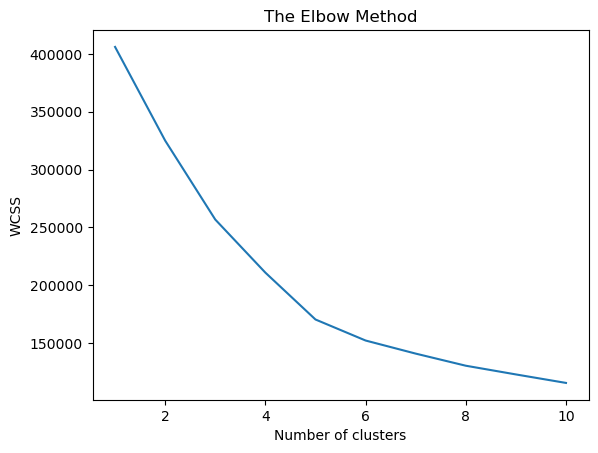

In [27]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Train your model

In [28]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init=15)
y_kmeans = kmeans.fit_predict(x)

In [29]:
kmeans.cluster_centers_

array([[-8.54528906e-01, -8.54528906e-01, -3.09738299e-02,
        -8.59099526e-02, -1.14438912e-01, -1.25388854e-01,
        -5.45075678e-02, -5.39303815e-02, -3.48103390e-01,
        -3.34118266e-01, -3.28499931e-01, -1.91762967e-01,
        -2.02738730e-01],
       [-5.21458142e-02, -5.21458142e-02,  2.77649372e-01,
         9.03560053e-02,  2.76642511e-01,  3.09112403e-01,
         1.99997380e-02,  1.32017749e-02,  2.09570349e+00,
         2.18516383e+00,  2.08756374e+00,  1.18572795e+00,
         1.20208064e-02],
       [ 8.77934350e-01,  8.77934350e-01, -5.61984728e-02,
        -9.92008707e-02, -1.24561250e-01, -1.16419348e-01,
        -8.25358505e-02, -8.37603807e-02, -3.12429128e-01,
        -3.44243664e-01, -3.21834794e-01, -1.79357116e-01,
         1.79429112e-01],
       [-1.09022179e+00, -1.09022179e+00,  4.44332061e-01,
         1.80152201e+01, -1.94260161e-01, -1.73903748e-01,
         1.91382911e+01,  1.95357996e+01,  1.55242848e+00,
        -5.68691440e-01, -4.47052298e

In [30]:
type(y_kmeans)

numpy.ndarray

In [31]:
set(y_kmeans)

{0, 1, 2, 3, 4}

In [32]:
print('conut of 0 : ', list(y_kmeans).count(0))
print('conut of 1 : ', list(y_kmeans).count(1))
print('conut of 2 : ', list(y_kmeans).count(2))
print('conut of 3 : ', list(y_kmeans).count(3))
print('conut of 4 : ', list(y_kmeans).count(4))

conut of 0 :  13562
conut of 1 :  4088
conut of 2 :  13330
conut of 3 :  64
conut of 4 :  196


In [33]:
from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(x, y_kmeans)

In [34]:
score

10826.177264343307

In [35]:
cdf['y kmeans'] = y_kmeans

In [36]:
cdf.head()

country iso_code       date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG 2021-02-22                 0.0                0.0   
1  Afghanistan      AFG 2021-02-23                 NaN                NaN   
2  Afghanistan      AFG 2021-02-24                 NaN                NaN   
3  Afghanistan      AFG 2021-02-25                 NaN                NaN   
4  Afghanistan      AFG 2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  y kmeans  
0  World Health Organization  https://covid19.who.int/         0  
1  World Health Organization  https://covid19.who.int/         0  
2  World Health Organization  https://covid19.who.int/         0  
3  World Health Organization  https://covid19.who.int/         0  
4  World Health Organization  https://covid19.who.int/         0

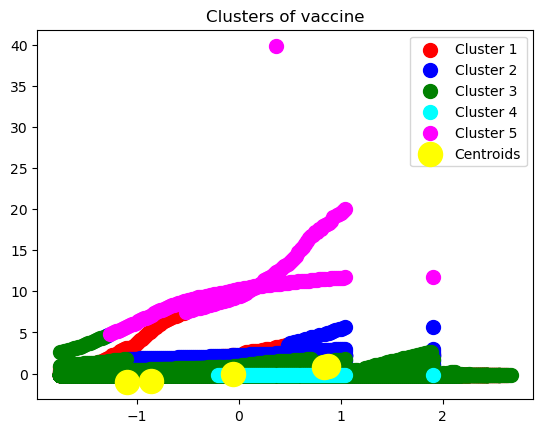

In [37]:
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 2], x[y_kmeans == 3, 4], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 2], x[y_kmeans == 4, 4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of vaccine')
plt.legend()
plt.show()

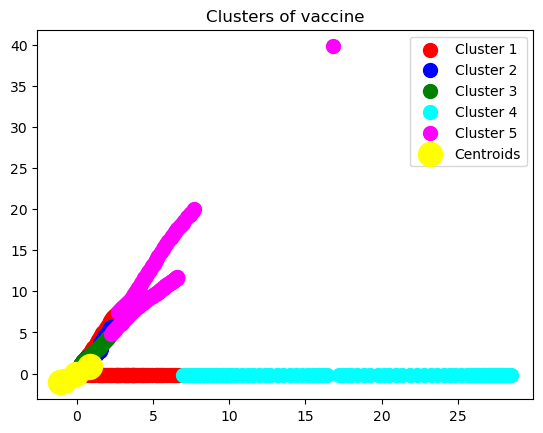

In [38]:
plt.scatter(x[y_kmeans == 0, 3], x[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 3], x[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 3], x[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 3], x[y_kmeans == 3, 4], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 3], x[y_kmeans == 4, 4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of vaccine')
plt.legend()
plt.show()

## Test the model and show the metrics

In [39]:
test = pd.read_csv('country_vaccinations_by_manufacturer.csv')
test.head()

location        date             vaccine  total_vaccinations
0  Austria  2021-01-08     Johnson&Johnson                   0
1  Austria  2021-01-08             Moderna                   0
2  Austria  2021-01-08  Oxford/AstraZeneca                   0
3  Austria  2021-01-08     Pfizer/BioNTech               30974
4  Austria  2021-01-15     Johnson&Johnson                   0

In [40]:
test.isnull().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

In [41]:
data_column_object = []
for column in test.columns:
    if test[column].dtype == 'object':
        data_column_object.append(column)
data_column_object

['location', 'date', 'vaccine']

In [42]:
for item in data_column_object:
    print(item)
    print(test[item].value_counts())
    print('-'*30)

location
Germany          804
Iceland          796
Italy            646
Lithuania        635
Latvia           627
Czechia          625
France           624
Romania          577
United States    484
Chile            481
Uruguay          417
Switzerland      296
Japan            185
Hungary          140
Netherlands      116
Poland           116
Finland          114
Slovakia         114
Austria          112
Spain            112
Croatia          103
Portugal         103
Ireland           98
Luxembourg        96
Bulgaria          95
Estonia           93
Belgium           92
Slovenia          86
Cyprus            84
Denmark           83
Sweden            80
Malta             79
Liechtenstein     44
Name: location, dtype: int64
------------------------------
date
2021-06-18    126
2021-06-11    126
2021-07-02    126
2021-06-25    126
2021-07-09    126
             ... 
2020-12-24      1
2020-12-04      1
2020-12-16      1
2020-12-20      1
2020-12-22      1
Name: date, Length: 208, dtype: int

In [43]:
for item in data_column_object:
    test[item] = pd.factorize(test[item])[0]
    test[item] = test[item].astype('category')

In [44]:
test.head()

location date vaccine  total_vaccinations
0        0    0       0                   0
1        0    0       1                   0
2        0    0       2                   0
3        0    0       3               30974
4        0    1       0                   0

In [45]:
x = np.asanyarray(test)

In [46]:
x = std.fit_transform(x)

In [47]:
x[:5]

array([[-1.82747164, -1.39498578, -1.54831193, -0.28484623],
       [-1.82747164, -1.39498578, -0.72396794, -0.28484623],
       [-1.82747164, -1.39498578,  0.10037606, -0.28484623],
       [-1.82747164, -1.39498578,  0.92472005, -0.28338183],
       [-1.82747164, -1.37985671, -1.54831193, -0.28484623]])

In [48]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10, random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

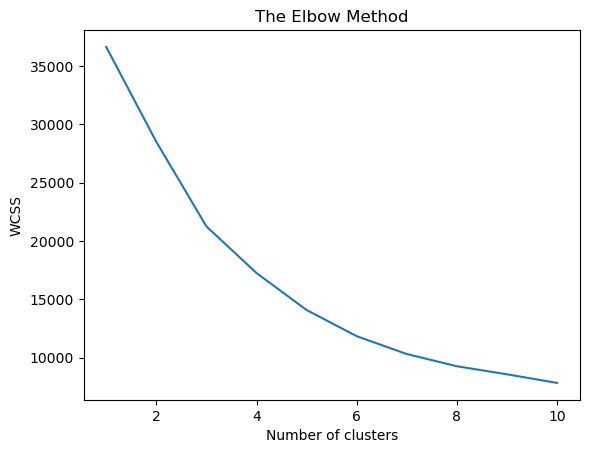

In [49]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
kmeans2 = KMeans(n_clusters = 3, init = 'k-means++', n_init=15)
y_kmeans = kmeans2.fit_predict(x)

In [51]:
test['Class'] = y_kmeans

In [52]:
test

location date vaccine  total_vaccinations  Class
0           0    0       0                   0      1
1           0    0       1                   0      1
2           0    0       2                   0      1
3           0    0       3               30974      1
4           0    1       0                   0      1
...       ...  ...     ...                 ...    ...
9152       32  202       3             1229299      0
9153       32  202       4             3140277      0
9154       32  203       2               61907      0
9155       32  203       3             1255929      0
9156       32  203       4             3140557      0

[9157 rows x 5 columns]

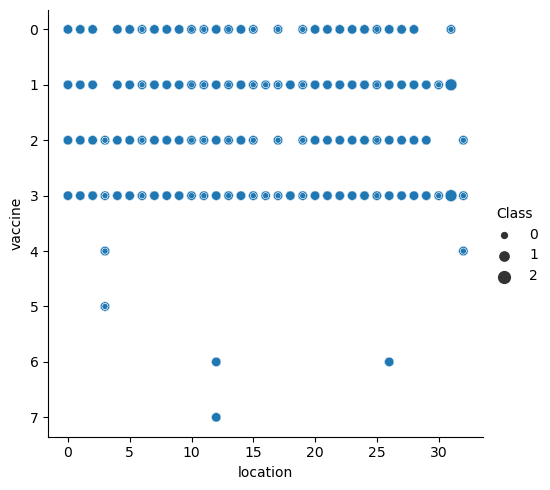

In [53]:
sb.relplot(x=test['location'], y = test['vaccine'], size= test['Class'] )

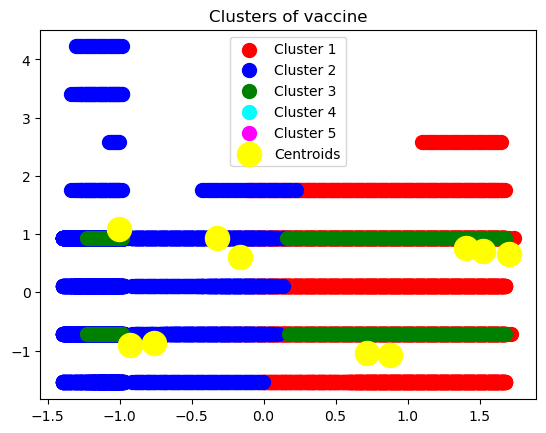

In [54]:
plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 1], x[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 1], x[y_kmeans == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of vaccine')
plt.legend()
plt.show()

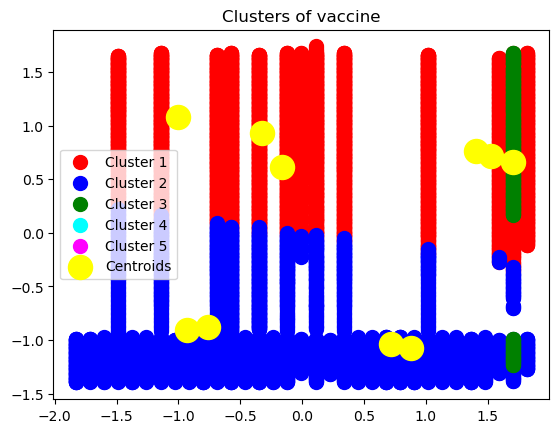

In [55]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of vaccine')
plt.legend()
plt.show()

## Save your final model

In [57]:
from joblib import dump
dump(kmeans, 'models_trained\kmeans.pkl')
dump(kmeans2, 'models_trained\kmeans2.pkl')

['models_trained\\kmeans2.pkl']

## Send us the Result (Maktabkhoone)